In [91]:
from __future__ import print_function, division
import requests
import pandas as pd
import numpy as np
import os.path
from bs4 import BeautifulSoup
import patsy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
import statsmodels.formula.api as smf
from statsmodels.tools.data import _is_using_pandas, _is_recarray
from statsmodels.tools.validation import array_like

In [17]:
data = pd.read_csv(r'C:\Users\andro\Metis\module2_repo\NBA\combined.csv')
df = pd.DataFrame(data, columns=['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'YEAR',
       'SALARY'])

In [18]:
df= df.drop(columns=['Player','Pos', 'Tm','FG','FGA','3P', 'G','GS','3PA','2P','2PA','eFG%','FT','FTA','ORB','DRB','STL','TOV','PF'])

In [19]:
df.head()

,Age,MP,FG%,3P%,2P%,FT%,TRB,AST,BLK,PTS,YEAR,SALARY
0,21,12.3,0.556,0.000,0.556,0.505,3.6,0.5,0.5,5.2,2021,2582160
1,24,2.6,0.125,0.000,0.167,0.000,0.4,0.3,0.0,0.3,2021,449115
2,27,27.9,0.616,0.000,0.623,0.435,8.8,1.9,0.7,7.8,2021,29592695
3,23,33.5,0.565,0.250,0.569,0.809,9.4,5.3,1.1,19.1,2021,5115492
4,35,25.9,0.473,0.388,0.505,0.872,4.5,1.9,1.1,13.5,2021,17628340


In [20]:
df.columns

Index(['Age', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'BLK', 'PTS',
       'YEAR', 'SALARY'],
      dtype='object')

In [21]:
df.corr()

,Age,MP,FG%,3P%,2P%,FT%,TRB,AST,BLK,PTS,YEAR,SALARY
Age,1.000000,0.100234,0.018465,0.054202,0.008687,0.102260,0.048042,0.096133,-0.010576,0.045865,-0.076762,0.306320
MP,0.100234,1.000000,0.227184,0.296169,0.162220,0.397352,0.668785,0.678845,0.391727,0.883039,-0.040269,0.572847
FG%,0.018465,0.227184,1.000000,-0.025189,0.824528,0.096520,0.415137,0.041569,0.401700,0.248398,0.039144,0.172995
3P%,0.054202,0.296169,-0.025189,1.000000,-0.064008,0.329987,-0.063604,0.281087,-0.157501,0.297855,0.136818,0.136964
2P%,0.008687,0.162220,0.824528,-0.064008,1.000000,0.067683,0.292292,0.023178,0.284854,0.188695,0.172087,0.141453
FT%,0.102260,0.397352,0.096520,0.329987,0.067683,1.000000,0.139212,0.290220,0.028346,0.382475,0.022087,0.205719
TRB,0.048042,0.668785,0.415137,-0.063604,0.292292,0.139212,1.000000,0.283950,0.703179,0.624959,0.008789,0.508095
AST,0.096133,0.678845,0.041569,0.281087,0.023178,0.290220,0.283950,1.000000,0.038841,0.688011,0.037585,0.507450
BLK,-0.010576,0.391727,0.401700,-0.157501,0.284854,0.028346,0.703179,0.038841,1.000000,0.348347,-0.020158,0.295064
PTS,0.045865,0.883039,0.248398,0.297855,0.188695,0.382475,0.624959,0.688011,0.348347,1.000000,0.048130,0.648985


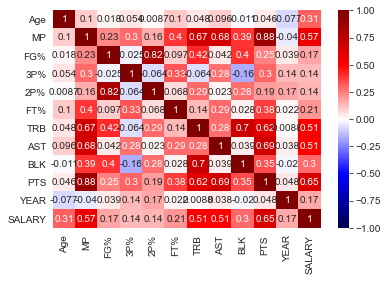

In [22]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [39]:
data2 = pd.read_csv(r'C:\Users\andro\Metis\module2_repo\NBA\train_val.csv')
df2 = pd.DataFrame(data2, columns=['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'YEAR',
       'SALARY'])

df2= df2.drop(columns=['Player','Pos', 'Tm','FG','FGA','3P', 'G','GS','3PA','2P','2PA','eFG%','FT','FTA','ORB','DRB','STL','TOV','PF'])

In [87]:
columns = ['Age', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'BLK', 'PTS','YEAR']

In [88]:
df2 = df2.dropna()

#Fitting and Scoring model on train+val
lr = LinearRegression()
X = df2[columns]
y = df2['SALARY']
lr.fit(X,y)
lr.score(X,y)

0.5330364772858351

In [89]:
#Scoring on test set
data3 = pd.read_csv(r'C:\Users\andro\Metis\module2_repo\NBA\test.csv')
df3 = pd.DataFrame(data3, columns=['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'YEAR',
       'SALARY'])

df3= df3.drop(columns=['Player','Pos', 'Tm','FG','FGA','3P', 'G','GS','3PA','2P','2PA','eFG%','FT','FTA','ORB','DRB','STL','TOV','PF'])
df3=df3.dropna()

Xtest = df3[columns]
ytest = df3['SALARY']
lr.fit(X,y)
lr.score(Xtest,ytest)

0.5665358555261741

In [43]:
lr.coef_

array([  416443.47659803,   -91671.65977873, -2428894.99390467,
       -1156608.51239547,   445708.36812588, -1371220.36575528,
         555212.55664715,   480692.49552754,   355934.46931354,
         550049.36928675,   368708.67165105])

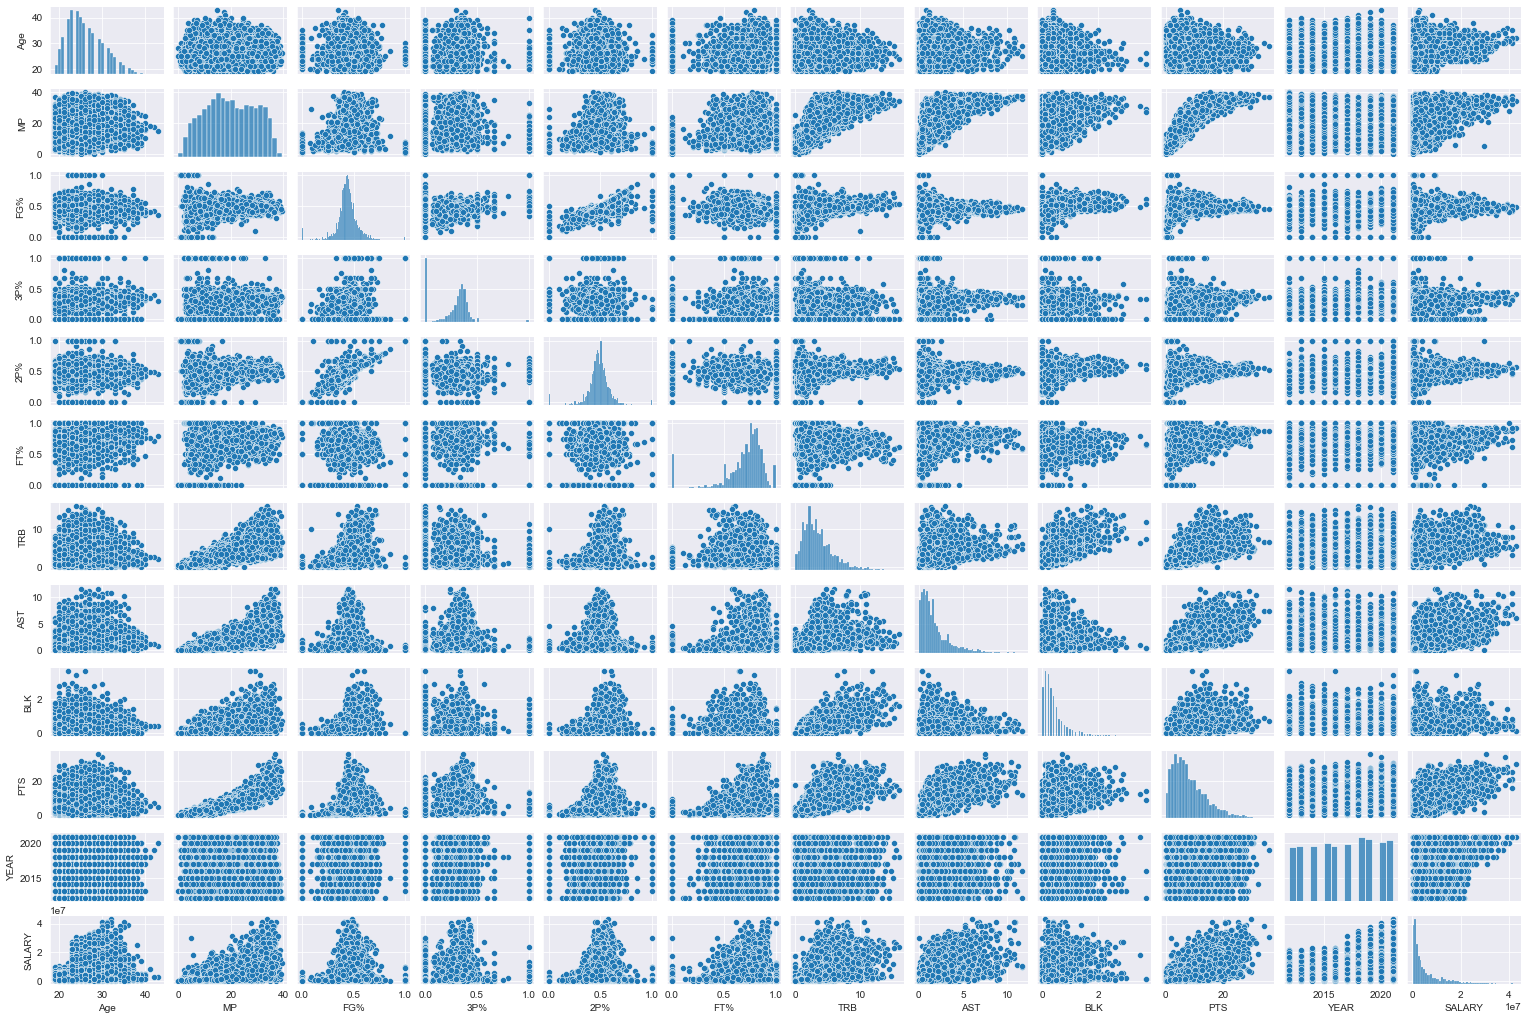

In [54]:
sns.pairplot(df, height=1.2, aspect=1.5)

In [95]:
#y, X = patsy.dmatrices('SALARY ~ Age + MP + FG% + 3P% + 2P% + FT% + TRB + AST + BLK + PTS + YEAR', data=df2, , return_type="dataframe")
X = sm.tools.tools.add_constant(X)
model = sm.OLS(y, X)

fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     373.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:12:32   Log-Likelihood:                -60023.
No. Observations:                3606   AIC:                         1.201e+05
Df Residuals:                    3594   BIC:                         1.201e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.526e+08    6.3e+07    -11.949      0.000   -8.76e+08   -6.29e+08
Age         4.164e+05   1.64e+04     25.329      0.000    3.84e+05    4.49e+05
MP         -9.167e+04   1.89e+04     -4.846      0.000   -1.29e+05   -5.46e+04
FG%        -2.429e+06   1.48e+06     -1.645      0.100   -5.32e+06    4.66e+05
3P%        -1.157e+06   4.95e+05     -2.338      0.019   -2.13e+06   -1.87e+05
2P%         4.457e+05   1.29e+06      0.347      0.729   -2.07e+06    2.97e+06
FT%        -1.371e+06   4.09e+05     -3.353      0.001   -2.17e+06   -5.69e+05
TRB         5.552e+05   5.38e+04     10.326      0.000     4.5e+05    6.61e+05
AST         4.807e+05   5.83e+04      8.242      0.000    3.66e+05    5.95e+05
BLK         3.559e+05   2.34e+05      1.520      0.128   -1.03e+05    8.15e+05
PTS           5.5e+05   2.73e+04     20.170      0.000    4.97e+05    6.04e+05
YEAR        3.687e+05   3.13e+04     11.797      0.000    3.07e+05     4.3e+05
==============================================================================
Omnibus:                      570.603   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1455.528
Skew:                           0.872   Prob(JB):                         0.00
Kurtosis:                       5.577   Cond. No.                     1.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

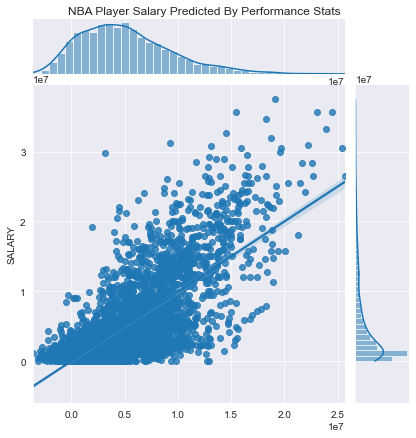

In [68]:
preds = lr.predict(X)
ax = sns.jointplot(x=preds,y=y, kind='reg')
ax.fig.suptitle('NBA Player Salary Predicted By Performance Stats')
ax.fig.subplots_adjust(top=0.95)

C:\Users\andro\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andro\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALARY', ylabel='Density'>

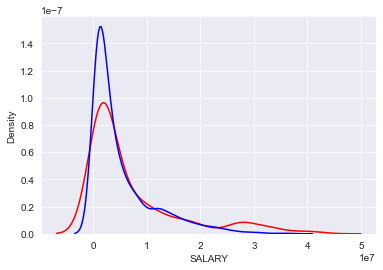

In [97]:
ax1 = sns.distplot(ytest, hist=False, color="r", label="Actual Value")
sns.distplot(y, hist=False, color="b", label="Fitted Values" , ax=ax1)